In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# see the description of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# find any nan values are here
df_nan=[daf for daf in df.columns]
for fea in df_nan:
    print(fea+' :',str(df[fea].isnull().sum())+'  Nanvalues')

Pregnancies : 0  Nanvalues
Glucose : 0  Nanvalues
BloodPressure : 0  Nanvalues
SkinThickness : 0  Nanvalues
Insulin : 0  Nanvalues
BMI : 0  Nanvalues
DiabetesPedigreeFunction : 0  Nanvalues
Age : 0  Nanvalues
Outcome : 0  Nanvalues


## let start implementation

In [6]:
# split the dataset into dependent and independent features
x=[data for data in df.columns if data!='Outcome']
X=df[x]
X.head()
Y=df[['Outcome']]
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X=StandardScaler().fit_transform(X)

### split the dataset into the train and test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

## Train the dataset using KNN

In [10]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [11]:
pred=knn.predict(X_test)

<IPython.core.display.Javascript object>

Text(0.5, 15.0, 'predicted label')

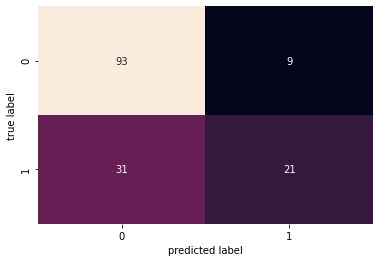

In [12]:
# validation of theparticular model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
cf=confusion_matrix(Y_test,pred)
sns.heatmap(cf, annot=True, cbar=False);
plt.ylabel('true label')
plt.xlabel('predicted label')

In [13]:
caf=classification_report(Y_test,pred)

## choosing the k value using cross validation technique

In [14]:
accuracy_rate = []
error_rate=[]


# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train.values.ravel())
    predi=knn.predict(X_test)
    score=cross_val_score(knn,X,df['Outcome'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(np.mean(predi!=Y_test.values.ravel()))

Text(0, 0.5, 'Error Rate')

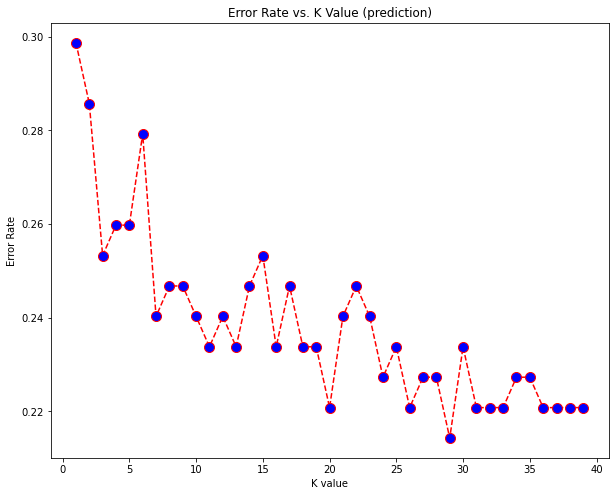

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='Red',linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value (prediction)')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [16]:
# from the above diagram we choose k=29 for better accuracy
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,Y_train.values.ravel())
pred1=knn.predict(X_test)
print(confusion_matrix(Y_test,pred1))
print(classification_report(Y_test,pred1))

[[91 11]
 [22 30]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       102
           1       0.73      0.58      0.65        52

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.75       154
weighted avg       0.78      0.79      0.78       154



## Accuracy evaluation

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred1))

0.7857142857142857


##  for decission tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
desc_mod=DecisionTreeClassifier(criterion='entropy',max_depth=4)
desc_mod.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
pred=desc_mod.predict(X_test)

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, pred))

DecisionTrees's Accuracy:  0.7792207792207793


In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       102
           1       0.66      0.73      0.69        52

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154

Confusion matrix, without normalization
[[82 20]
 [14 38]]


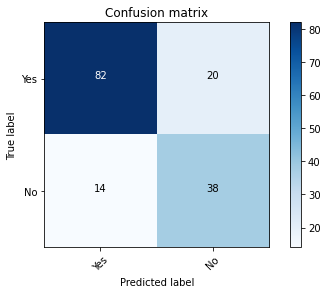

In [23]:
cf=confusion_matrix(Y_test, pred, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(Y_test, pred))
plt.figure()
plot_confusion_matrix(cf, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

# using ensemble techniques

## Hyper parameter optimisation for ensemble technique

In [24]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [25]:
params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## Random forest classifier

In [28]:
classifier=RandomForestClassifier()

In [29]:
random= RandomizedSearchCV(estimator = classifier, param_distributions =params , n_iter = 100, cv = 3, verbose=2, 
                           random_state=42, n_jobs = -1)

In [30]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished
D:\chansfolder\anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



 Time taken: 0 hours 2 minutes and 42.48 seconds.


In [31]:
random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [32]:
ran=RandomForestClassifier(n_estimators=1200,
 min_samples_split=10,
 min_samples_leaf=4,
 max_features='sqrt',
 max_depth=100,
 bootstrap=True)

In [33]:
ran.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1200)

In [34]:
rpred=ran.predict(X_test)

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("random forest's Accuracy: ", metrics.accuracy_score(Y_test, rpred))

random forest's Accuracy:  0.7922077922077922


##  using support vector machines

In [36]:
# split the dataset into train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [37]:
# using svm classification
from sklearn.svm import SVC
sv=SVC(kernel='rbf')

In [38]:
sv.fit(X_train,Y_train.values.ravel())

SVC()

In [39]:
ysv=sv.predict(X_test)

In [40]:
print('svm accuracy score is',metrics.accuracy_score(Y_test,ysv))

svm accuracy score is 0.7662337662337663


###  Evaluation

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.rainbow):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       102
           1       0.67      0.62      0.64        52

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion matrix, without normalization
[[86 16]
 [20 32]]


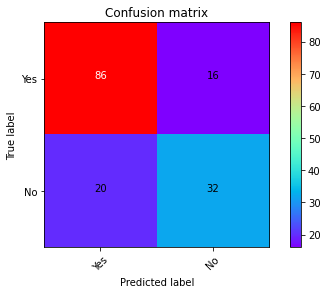

In [42]:
cf=confusion_matrix(Y_test, ysv, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(Y_test, ysv))
plt.figure()
plot_confusion_matrix(cf, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

In [44]:
import pickle
# open a file, where you ant to store the data
file = open('diabetes_model.pkl', 'wb')

# dump information to that file
pickle.dump(ran, file)